# Data Exploratie 

# Index
- 2. [Data Understanding](#data-understanding)
    - 2.1 [Basis analyse](#basis-anaylyse)
    - 2.2 [Skewness](#skewness)
    - 2.3 [Grafieken](#grafieken)
    - 2.4 [Correlaties en Scatter Matrix](#correlaties-scatter)
- 3. [Data Preparation](#data-prep)
    - 3.1 [Afwijkingen uit fase 2 onderzoeken en oplossen](#afwijkingen)
    - 3.2 [Keys feature](#keys-feature)
    - 3.3 [Outliers detecteren en winsoriseren](#outliers-winsor)
    - 3.4 [Feature Engineering](#feature-eng)

### Phase 1: Business Understanding

Het doel van dit model is om te testen of populariteit van een nummer 
<br>
voorspelt kan worden met lineaire regressie o.b.v de audio-features 
<br>
in deze dataset. 

<a id="data-understanding"></a>
# 2. Data Understanding

In [129]:
# Modules importeren
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

In [130]:
# Dataset importeren 
df = pd.read_csv("/Users/odessa/Desktop/Applied Data Science & AI/Data Science/Code Inleiding data science/song_data.csv")

In [131]:
df_num = df.select_dtypes(include=['number']).copy()

<a id="basis-anaylyse"></a>
### 2.1 Basis analyse

In [132]:
# Eerste 5 rijen van de dataframe printen
display(df.head())

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [133]:
df.shape
# Er zijn 18_835 rijen en 15 kolommen in deze dataset.

(18835, 15)

In [134]:
# Dtypes bekijken
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [135]:
# Statistiche informatie weergeven 
df.describe().T

# Opvallend: 
# Time_signature van 0 
# Tempo heeft een minimum van 0

# danceability minimum = 0 checken ?
# speechiness minimum = 0 checken ?

# Deze punten worden aangepakt in fase 3 

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


In [136]:
# Zijn er missende waardes? 
df.isnull()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18831,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18832,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [137]:
# Hoeveel waardes zitten in de dataframe? 
print(f"Totaal aantal waardes in de dataframe: {len(df)}")

# Hoeveel unieke rijen in elke kolom? 
df.nunique().sort_values(ascending=False)

Totaal aantal waardes in de dataframe: 18835


song_name           13070
tempo               12112
song_duration_ms    11771
loudness             8416
instrumentalness     3925
acousticness         3209
liveness             1425
audio_valence        1246
speechiness          1224
energy               1132
danceability          849
song_popularity       101
key                    12
time_signature          5
audio_mode              2
dtype: int64

<a id="skewness"></a>
### 2.2 Skewness

### Skewness berekenen

https://samawat-ai.medium.com/skewness-and-kurtosis-c571fc4e0c0f

In [138]:
from scipy.stats import skew 
from scipy.stats import kurtosis

In [139]:
def skewness_kurtosis(df):
    skewness = df.skew(numeric_only=True)
    kurtosis = df.kurt(numeric_only=True)

    stats_skew_kurt = pd.DataFrame({
        'skewness': skewness,
        'kurtosis': kurtosis
    })

    def highlighter(rij):
        skew = rij['skewness']
        color = ''
        if skew > 1 or skew < -1: # Hoge scheefheid (groter dan 1 of kleiner dan -1) kleur = rood 
            color = 'background-color: red; color: black;'
        elif 0.5 < abs(skew) <=1: # Matige scheefheid (scheefheid tussen -1 en -0.5 of tussen 0.5 en 1) kleur = blauw 
            color = 'background-color: #336df5; color: black;'
        elif abs(skew) <= 0.5: # Redelijk symmetrische distributie (scheefheid tussen -0.5 en 0.5) geen highlight
            color = 'color: white;'
        return ['' if c != 'skewness' else color for c in stats_skew_kurt.columns]
    
    styled = stats_skew_kurt.style.apply(highlighter, axis=1)
    display(styled)
    return stats_skew_kurt

skewness_kurtosis(df)

,skewness,kurtosis
song_popularity,-0.501487,-0.169104
song_duration_ms,3.257477,46.708949
acousticness,1.071164,-0.096276
danceability,-0.391719,-0.074797
energy,-0.620738,-0.137875
instrumentalness,2.985176,7.563664
key,-0.002520,-1.311466
liveness,2.215423,5.789919
loudness,-1.929511,6.522480
audio_mode,-0.530308,-1.718956


,skewness,kurtosis
song_popularity,-0.501487,-0.169104
song_duration_ms,3.257477,46.708949
acousticness,1.071164,-0.096276
danceability,-0.391719,-0.074797
energy,-0.620738,-0.137875
instrumentalness,2.985176,7.563664
key,-0.002520,-1.311466
liveness,2.215423,5.789919
loudness,-1.929511,6.522480
audio_mode,-0.530308,-1.718956


In [140]:
stats = skewness_kurtosis(df_num)
skewed_cols = stats.loc[stats['skewness'].abs() > 1].index.tolist()
print("Sterk scheve kolommen:", skewed_cols)

,skewness,kurtosis
song_popularity,-0.501487,-0.169104
song_duration_ms,3.257477,46.708949
acousticness,1.071164,-0.096276
danceability,-0.391719,-0.074797
energy,-0.620738,-0.137875
instrumentalness,2.985176,7.563664
key,-0.002520,-1.311466
liveness,2.215423,5.789919
loudness,-1.929511,6.522480
audio_mode,-0.530308,-1.718956


Sterk scheve kolommen: ['song_duration_ms', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'time_signature']


### Observatie 

song_duration_ms, acousticness, instrumentalness, liveness, loudness, speechiness en time_signature zijn erg scheef verdeeld. 
<br>
song_popularity, energy en audio_mode zijn matig scheef verdeeld. 
<br>
De rest wat geen kleur heeft is redelijk normaal verdeeld. 

<a id="grafieken"></a>
### 2.3 Grafieken

<function matplotlib.pyplot.show(close=None, block=None)>

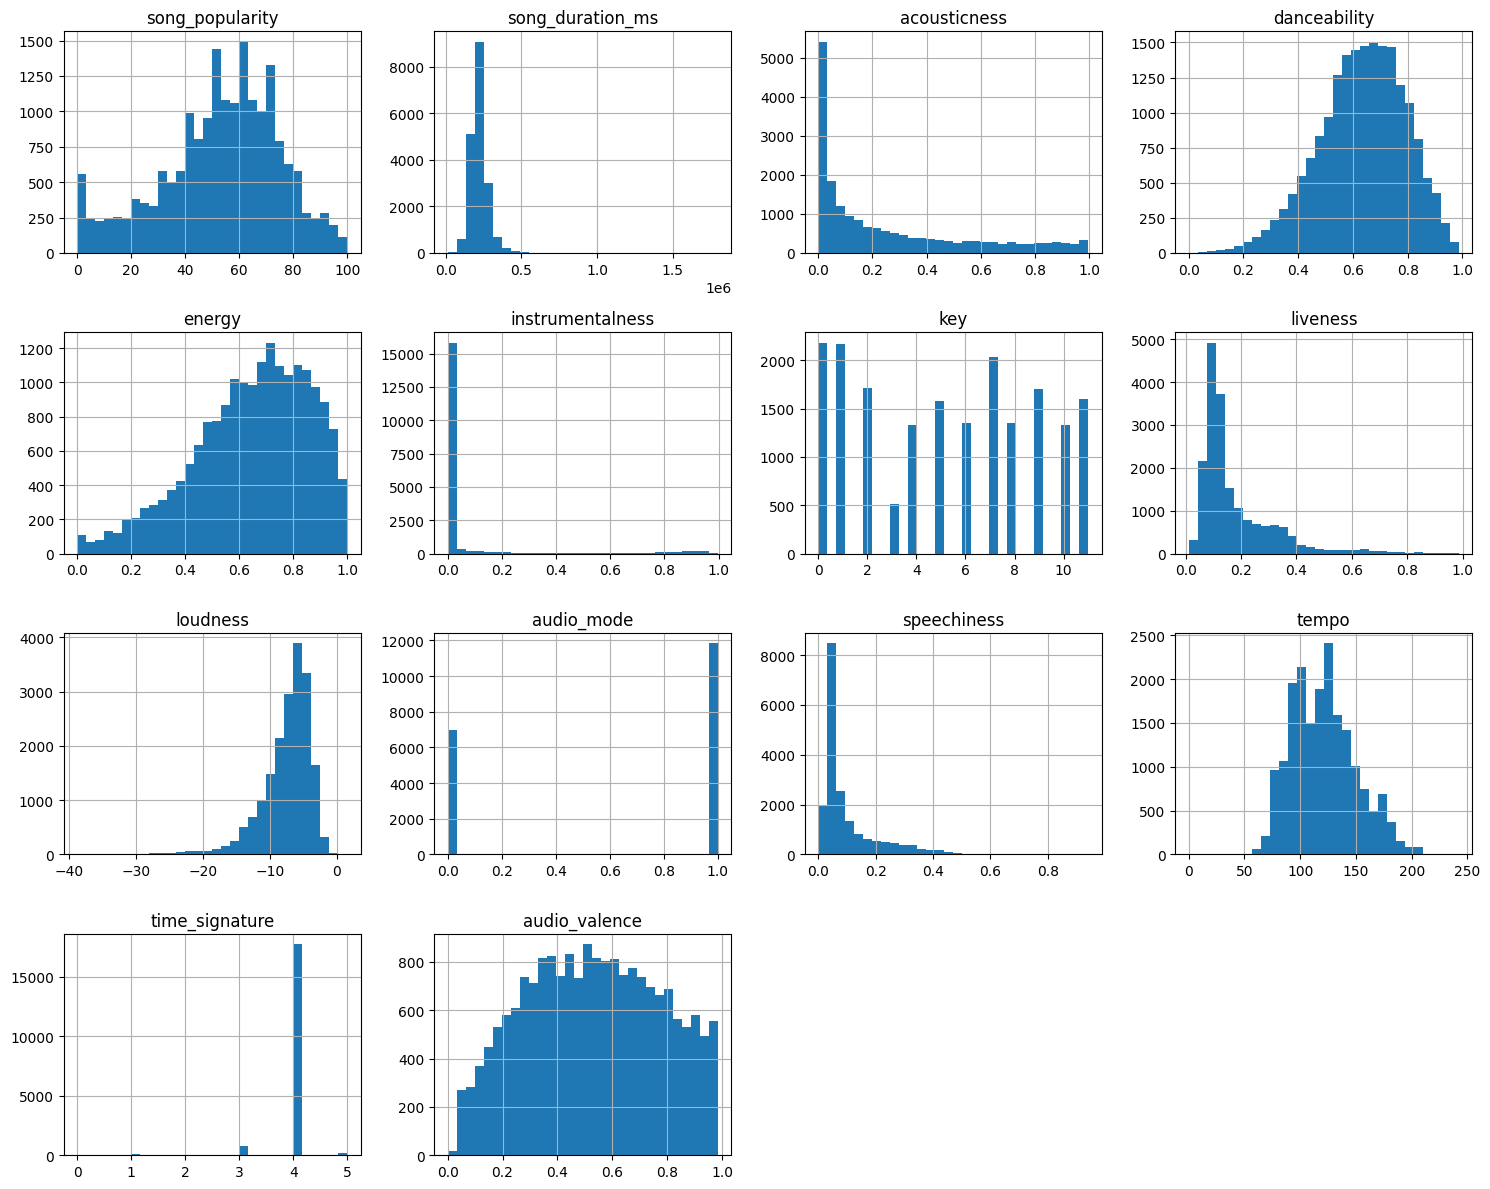

In [141]:
# Matplotlib histogrammen plotten 
df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show

### Observatie Grafieken

Discrete features: audio_mode, time_signature, key(cyclisch)
<br>
Continue features: alle andere features
<br>
Skewness komt overeen met skewness berekeningen

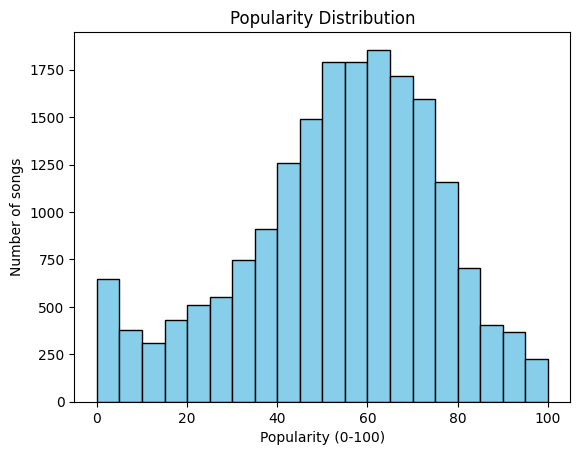

In [142]:
# Plot popularity distribution
plt.hist(df["song_popularity"], bins=20, color="skyblue", edgecolor="black")
plt.title("Popularity Distribution")
plt.xlabel("Popularity (0-100)")
plt.ylabel("Number of songs")
plt.show()

### Observatie 
Piek tussen 50 en 75.

### Discrete variabelen plotten 

In [143]:
# Target variabele maken 
target = 'song_popularity'

X = df.copy()
y = X.pop(target)

In [144]:
cat_cols = ['key', 'audio_mode', 'time_signature']
num_cols = df.drop(columns=cat_cols).columns

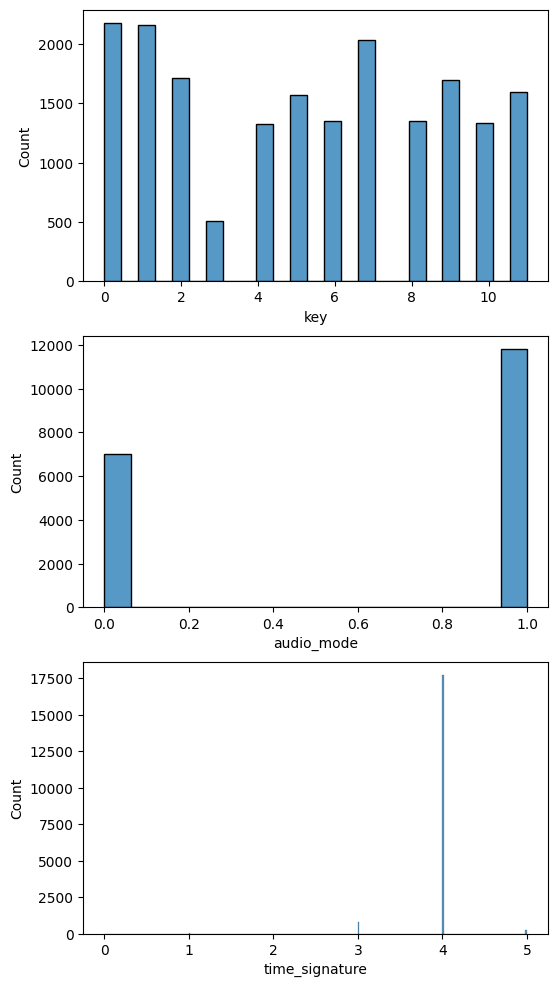

In [145]:
fig, axs = plt.subplots(len(cat_cols), figsize=(6, len(cat_cols)*4))

for col, ax in zip(cat_cols, axs):
    sns.histplot(X[col], ax=ax, edgecolor='black')

<a id="correlaties-scatter"></a>
### 2.4 Correlaties en Scatter Matrix

0.00 – 0.30	nauwelijks of geen correlatie
<br>
0.30 – 0.50	lage of zwakke correlatie
<br>
0.50 – 0.70	middelmatige correlatie
<br>
0.70 – 0.90	hoge of sterke correlatie
<br>
0.90 – 1.00	zeer hoge of zeer sterke correlatie

In [146]:
corr_matrix = df_num.corr()
print(corr_matrix['song_popularity'].sort_values(ascending=True))

instrumentalness   -0.130907
acousticness       -0.065181
audio_valence      -0.052895
liveness           -0.038937
tempo              -0.022672
song_duration_ms   -0.018899
key                -0.013160
audio_mode         -0.004969
energy              0.001365
speechiness         0.021479
time_signature      0.034983
loudness            0.099442
danceability        0.104290
song_popularity     1.000000
Name: song_popularity, dtype: float64


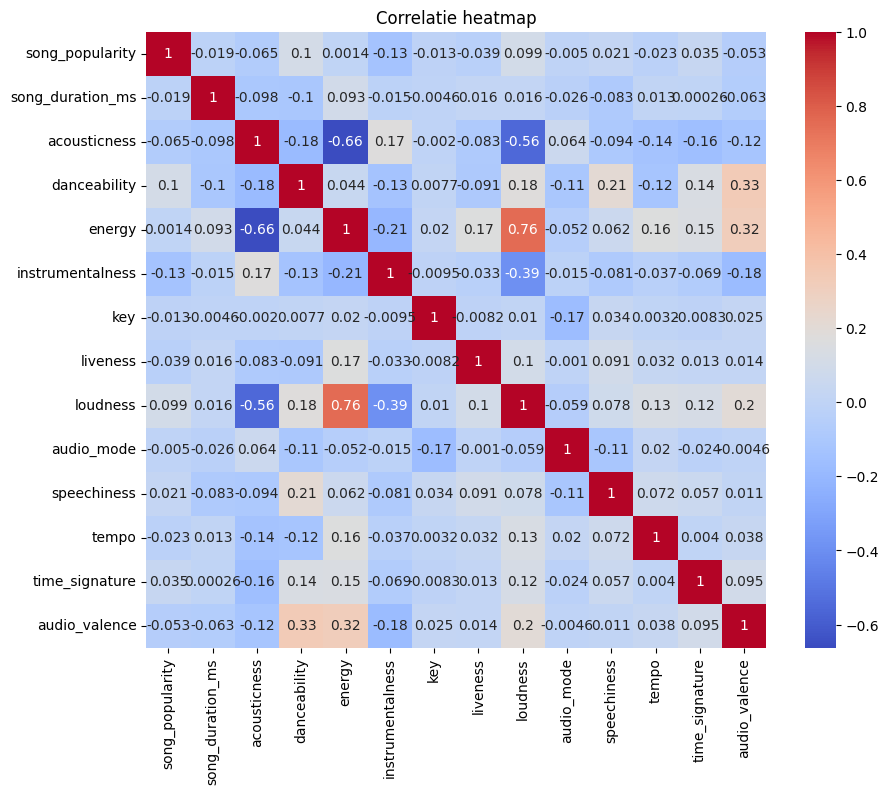

In [147]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlatie heatmap")
plt.show()

# Loudness en energy hebben een sterke positieve correlatie: 0.77
# energy en acousticness hebben een redelijk sterke negatieve correlatie: -0.68
# loudness en acousticness hebben een negatieve correlatie: -0.57 
# loudness en instrumentallness hebben een negatieve correlatie: -0.4

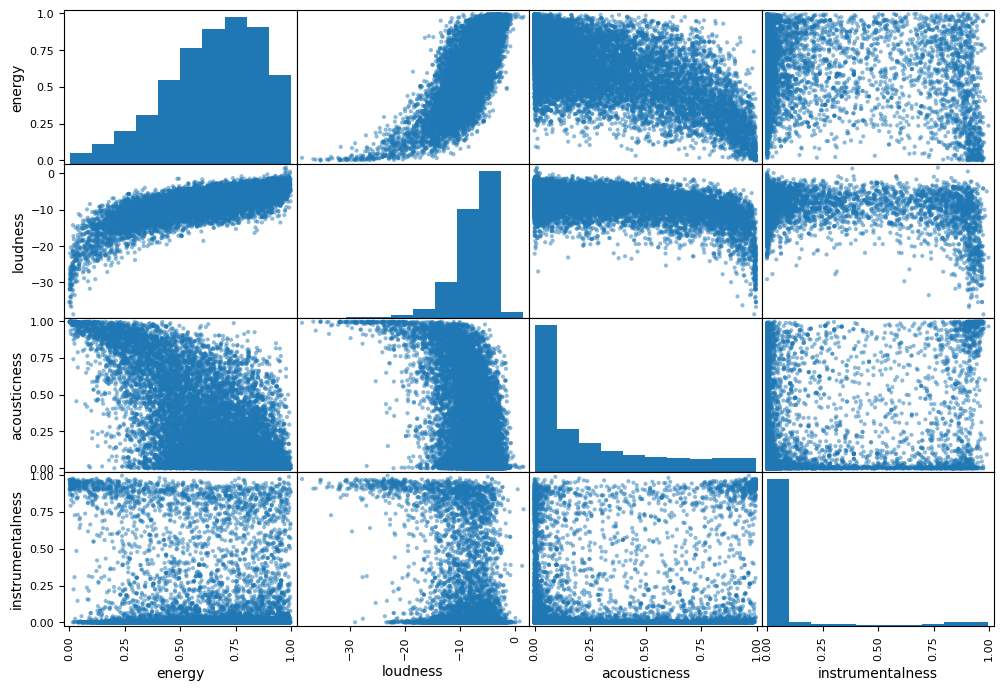

In [148]:
attributes = ["energy", "loudness", "acousticness",
"instrumentalness"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

<a id="data-prep"></a>
# 3. Data Preparation

<a id="afwijkingen"></a>
### 3.1 Afwijkingen uit fase 2 onderzoeken en oplossen

In [149]:
# time_signature gaat van 3 tot 7 volgens spotify api
df["time_signature"].value_counts()
# waardes van 0 en 1 kan niet 

time_signature
4    17754
3      772
5      233
1       73
0        3
Name: count, dtype: int64

In [150]:
# Indexen van time_signature == 0 
time_sig_is_zero = df[df['time_signature'] == 0]
print(time_sig_is_zero['time_signature'])

7119     0
11171    0
18120    0
Name: time_signature, dtype: int64


In [151]:
# Indexen van time_signature == 1
time_sig_is_one = df[df['time_signature'] == 1]
print(time_sig_is_one['time_signature'])

53       1
246      1
405      1
1347     1
1802     1
        ..
18409    1
18540    1
18553    1
18741    1
18787    1
Name: time_signature, Length: 73, dtype: int64


In [152]:
# Dataframe maken van time_signatures 0 en 1 
df_time_signature_0_1 = pd.concat([time_sig_is_zero, time_sig_is_one])

In [153]:
# Statistische berekeningen zien van waardes met time signatures van 0 en 1 
display(df_time_signature_0_1.describe())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,47.381579,201639.921053,0.483354,0.476434,0.508358,0.230627,5.157895,0.173304,-9.787329,0.723684,0.133330,105.422816,0.960526,0.337376
std,21.230775,61518.832384,0.358363,0.177620,0.254828,0.368614,3.513982,0.142725,4.923199,0.450146,0.150301,36.808287,0.196013,0.231355
min,0.000000,12000.000000,0.000001,0.000000,0.003790,0.000000,0.000000,0.064000,-29.298000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.250000,174079.500000,0.126000,0.374250,0.303500,0.000000,2.000000,0.099125,-10.865500,0.000000,0.034500,79.569250,1.000000,0.157250
50%,52.000000,196173.000000,0.469500,0.505500,0.539000,0.001705,5.500000,0.120000,-9.009500,1.000000,0.052550,100.456500,1.000000,0.291000
75%,61.250000,225076.000000,0.813000,0.603000,0.723000,0.328500,8.000000,0.199000,-6.810250,1.000000,0.193500,119.626750,1.000000,0.488250
max,80.000000,435040.000000,0.991000,0.833000,0.992000,0.963000,11.000000,0.944000,-3.127000,1.000000,0.663000,200.729000,1.000000,0.908000


In [154]:
display(df_time_signature_0_1.sort_values(by='song_duration_ms').head(25))
#TO-DO: index 7119 verwijderen 

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7119,Gina Rodriguez - Latinos Trending Intro,0,12000,0.700000,0.000,0.493,0.000000,7,0.4570,-6.102,1,0.0000,0.000,0,0.0000
18064,Sparta,33,65533,0.314000,0.553,0.833,0.576000,11,0.2370,-9.427,0,0.0812,99.928,1,0.0366
11109,Circles,61,97265,0.793000,0.492,0.336,0.910000,0,0.1040,-11.989,0,0.2030,75.278,1,0.1580
11171,Aura,50,102536,0.077400,0.000,0.560,0.963000,11,0.5890,-9.866,1,0.0000,0.000,0,0.0000
11155,Noairleft,51,110769,0.798000,0.604,0.291,0.889000,0,0.1440,-13.967,1,0.3920,78.066,1,0.1110
4415,Lost,57,121338,0.130000,0.694,0.335,0.898000,2,0.3270,-6.355,0,0.0531,142.466,1,0.6630
5940,Cosmic Cave,48,123578,0.942000,0.138,0.212,0.887000,5,0.1700,-20.923,0,0.0305,81.677,1,0.4050
14376,Super!,28,124235,0.206000,0.594,0.493,0.745000,4,0.1190,-9.432,1,0.2950,75.285,1,0.5530
5875,Could This Be Magic,39,138213,0.718000,0.345,0.304,0.000000,1,0.0869,-9.744,1,0.0296,109.892,1,0.5530
14509,Coração Vagabundo,7,143426,0.785000,0.577,0.312,0.097600,0,0.1380,-13.453,0,0.0448,80.698,1,0.3720


In [155]:
display(df_time_signature_0_1.sort_values(by='danceability').head(25))
# TO-DO: index 11171 verwijderen want speechiness, danceability en tempo = 0, 

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7119,Gina Rodriguez - Latinos Trending Intro,0,12000,0.700000,0.000,0.49300,0.000000,7,0.4570,-6.102,1,0.0000,0.000,0,0.0000
11171,Aura,50,102536,0.077400,0.000,0.56000,0.963000,11,0.5890,-9.866,1,0.0000,0.000,0,0.0000
5940,Cosmic Cave,48,123578,0.942000,0.138,0.21200,0.887000,5,0.1700,-20.923,0,0.0305,81.677,1,0.4050
15283,I Think You're Really Beautiful,47,149327,0.913000,0.174,0.56900,0.924000,2,0.6420,-6.422,1,0.0387,86.557,1,0.2230
4817,Hypnotize,53,177462,0.002820,0.197,0.27800,0.938000,2,0.0999,-18.640,1,0.0520,73.710,1,0.0338
4803,A Drop In The Ocean,52,293647,0.463000,0.199,0.11900,0.894000,0,0.2370,-21.529,1,0.0388,110.848,1,0.0630
14950,Woman,22,176306,0.000051,0.219,0.95200,0.098900,2,0.1570,-3.621,1,0.1760,112.886,1,0.1720
53,Woman,63,176306,0.000051,0.219,0.95200,0.098900,2,0.1570,-3.621,1,0.1760,112.886,1,0.1720
16842,Clockworks,0,435040,0.000002,0.228,0.98000,0.833000,1,0.2890,-5.313,1,0.1100,129.939,1,0.3640
13337,The Watchtower,74,205577,0.991000,0.248,0.02740,0.922000,7,0.1530,-28.768,0,0.0333,75.124,1,0.1590


In [156]:
# Tempo waardes sorteren van laag naar hoog 
df = df.sort_values('tempo')

# Nummers met een tempo van 0. 
nul_tempo = df.loc[df['tempo'] == 0, ['song_name', 'tempo', 'song_popularity']]
print(f'Nummers met een tempo van 0: {nul_tempo}')

# Tempo == 0 is opgelost na verwijderen nummers 9499 en 6415

Nummers met een tempo van 0:                                      song_name  tempo  song_popularity
11171                                     Aura    0.0               50
7119   Gina Rodriguez - Latinos Trending Intro    0.0                0


In [157]:
# Bij song_name veel dubbele waardes 
totaal_song_name = df['song_name'].count()
unieke_song_name = df['song_name'].nunique()
dubbel_song_name = totaal_song_name - unieke_song_name

print(f"song_name heeft {dubbel_song_name} dubbele waardes")

song_name heeft 5765 dubbele waardes


In [158]:
df['instrumentalness'].value_counts()

instrumentalness
0.000000    7150
0.000003      37
0.001070      21
0.001140      20
0.000512      18
            ... 
0.000083       1
0.685000       1
0.002120       1
0.003450       1
0.005220       1
Name: count, Length: 3925, dtype: int64

In [159]:
# 2 nummers droppen
df = df.drop([7119, 11171]).reset_index(drop=True)

<a id="keys-feature"></a>
### 3.2 Keys feature 

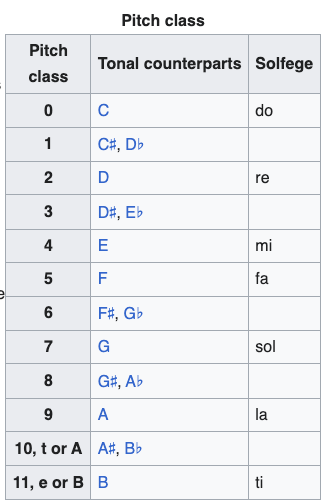

Dit is circulair: 12 en 0 zijn dezelfde toonsoort. 

0 (C) en 11 (B)  liggen numeriek ver uit elkaar, maar muzikaal liggen ze recht naast elkaar 


https://towardsdatascience.com/cyclical-encoding-an-alternative-to-one-hot-encoding-for-time-series-features-4db46248ebba/

https://medium.com/@axelazara6/why-we-need-encoding-cyclical-features-79ecc3531232

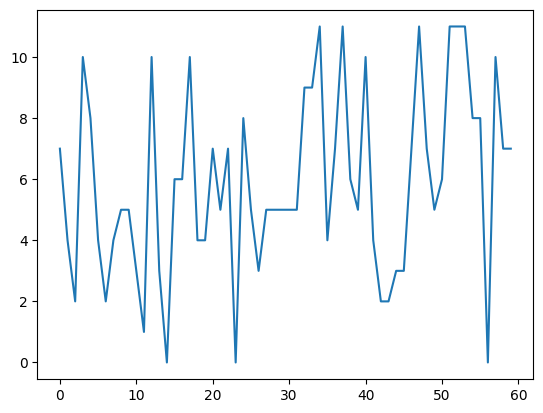

In [160]:
# Plotten van key met sample van de eerste 60 data 
sample = df[:60]
ax = sample['key'].plot()

In [161]:
# Handmatig cyclisch encoden 

df['key_sin'] = np.sin(2*np.pi*df['key']/12)
df['key_cos'] = np.cos(2*np.pi*df['key']/12)

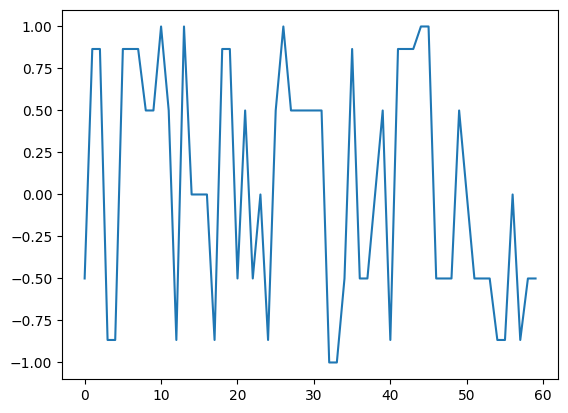

In [162]:
# Plotten van key met eerste 60 data na cyclisch encoden. 
sample = df[:60]
ax = sample['key_sin'].plot()

De schaal is veranderd naar -1 tot +1 

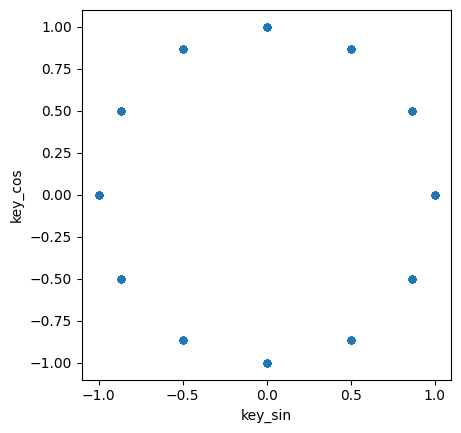

In [163]:
# Plot twee dimensioneel perspectief 
ax = df.plot.scatter('key_sin', 'key_cos').set_aspect('equal')

<a id="outliers-winsor"></a>
### 3.3 Outliers detecteren en winsoriseren 

In [164]:
# Handmatige functies voor IKR grenzen berekenen, uitschieters detecteren en winsoriseren. 
def ikr_grenzen_berekenen(df: pd.DataFrame, kolommen=None):
    """
    Berekent voor elke numerieke kolom de onder- en bovengrens 
    op basis van interkwartielafstand (IKR).
    """
    if kolommen is None: 
        kolommen = df.select_dtypes(include=['int64', 'float64']).columns
    
    grenzen = {}

    for kolom in kolommen: 
        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IKR = Q3 - Q1 
        ondergrens = Q1 - 1.5 * IKR
        bovengrens = Q3 + 1.5 * IKR
        grenzen[kolom] = (ondergrens, bovengrens)

    return grenzen 


def uitschieters_detecteren(df: pd.DataFrame, grenzen: dict):
    """
    Geeft een overzicht van het aantal uitschieters en percentage uitschieters per kolom.
    """
    overzicht = []
    totaal_rijen = len(df)

    for kolom, (ondergrens, bovengrens) in grenzen.items():
        voorwaarde = (df[kolom] < ondergrens) | (df[kolom] > bovengrens)
        aantal = voorwaarde.sum()
        overzicht.append({
            'kolom': kolom,
            'aantal_uitschieters': aantal,
            'percentage': round(100 * aantal / totaal_rijen, 2)
        })
    return pd.DataFrame(overzicht).sort_values('percentage', ascending = False)

def winsoriseren(df: pd.DataFrame, grenzen: dict):
    """
    Winsorisatie functie: waarden buiten de grenzen worden vervangen 
    door de dichtstbijzijnde grenswaarde.
    """
    df_gecorrigeerd = df.copy()
    for kolom, (ondergrens, bovengrens) in grenzen.items():
        df_gecorrigeerd[kolom] = df_gecorrigeerd[kolom].astype(float)
        df_gecorrigeerd.loc[df_gecorrigeerd[kolom] < ondergrens, kolom] = ondergrens
        df_gecorrigeerd.loc[df_gecorrigeerd[kolom] > bovengrens, kolom] = bovengrens
    return df_gecorrigeerd

In [165]:
# Song_popularity eerst splitsen van de rest 
x = df.drop(columns=[target])
y = df[target]

In [166]:
grenzen = ikr_grenzen_berekenen(x)
display(uitschieters_detecteren(df, grenzen))

,kolom,aantal_uitschieters,percentage
4,instrumentalness,4069,21.61
9,speechiness,2175,11.55
6,liveness,1203,6.39
11,time_signature,1079,5.73
0,song_duration_ms,824,4.38
7,loudness,705,3.74
3,energy,151,0.80
2,danceability,131,0.70
10,tempo,79,0.42
5,key,0,0.00


<br>
song_duration_ms. Winsoriseren 
<br>
loudness. Winsoriseren
<br>
tempo. Winsoriseren

In [167]:
# Kolommen kiezen voor winsorisatie 
kolommen_winsoriseren = ['song_duration_ms', 'loudness', 'tempo']

#  Grenzen berekenen 
grenzen_voor = ikr_grenzen_berekenen(x[kolommen_winsoriseren])

In [168]:
# Uitschieters detecteren 
uitschieters_voor = uitschieters_detecteren(x, grenzen_voor)
display(uitschieters_voor)

,kolom,aantal_uitschieters,percentage
0,song_duration_ms,824,4.38
1,loudness,705,3.74
2,tempo,79,0.42


In [169]:
# Kopie maken van x dataframe (df zonder target)
df_gecorrigeerd = x.copy()
# Winsorisatie toepassen op geselecteerde kolommen 
df_gecorrigeerd[kolommen_winsoriseren] = winsoriseren(x[kolommen_winsoriseren], grenzen_voor)

In [170]:
grenzen_na = ikr_grenzen_berekenen(df_gecorrigeerd[kolommen_winsoriseren])
uitschieters_na = uitschieters_detecteren(df_gecorrigeerd, grenzen_na)
display(uitschieters_na)

,kolom,aantal_uitschieters,percentage
0,song_duration_ms,0,0.0
1,loudness,0,0.0
2,tempo,0,0.0


In [171]:
# target terugzetten 
df_gecorrigeerd.insert(0, target, y)
display(df_gecorrigeerd.head())

,song_popularity,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,key_sin,key_cos
0,62,...Familiar Place,175777.0,0.0128,0.2140,0.148,0.058,7,0.1130,-15.248,1,0.0370,46.591,4,0.0277,-0.500000,-0.866025
1,46,Not Part of the Broken Hearts Club,147373.0,0.9190,0.7100,0.114,0.000,4,0.1540,-12.764,0,0.2690,47.953,4,0.4330,0.866025,-0.500000
2,52,Enter,230000.0,0.8080,0.1460,0.126,0.949,2,0.3270,-15.248,1,0.0400,51.607,4,0.0356,0.866025,0.500000
3,11,Vasoonak,272506.0,0.2750,0.5480,0.493,0.000,10,0.0634,-12.743,1,0.1760,52.181,4,0.6340,-0.866025,0.500000
4,47,Portugal (A Lift),330538.0,0.6630,0.0594,0.216,0.918,8,0.0451,-15.248,1,0.0493,54.213,4,0.0243,-0.866025,-0.500000


In [172]:
print(df_gecorrigeerd.select_dtypes(include=['int64', 'float64']).columns)

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'key_sin', 'key_cos'],
      dtype='object')


<a id="feature-eng"></a>
### 3.4 Feature Engineering

### Scaling

<Axes: ylabel='Frequency'>

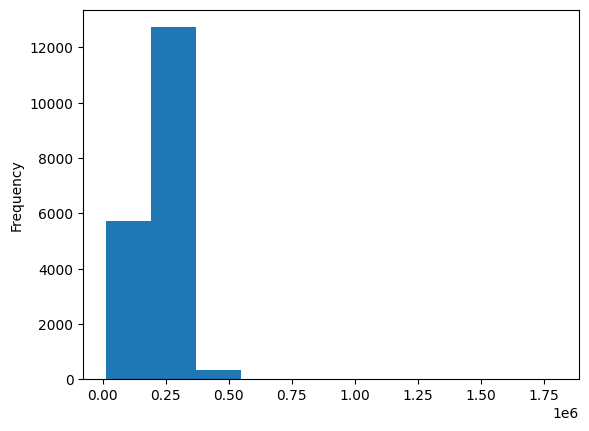

In [173]:
X['song_duration_ms'].plot.hist()

<Figure size 640x480 with 0 Axes>

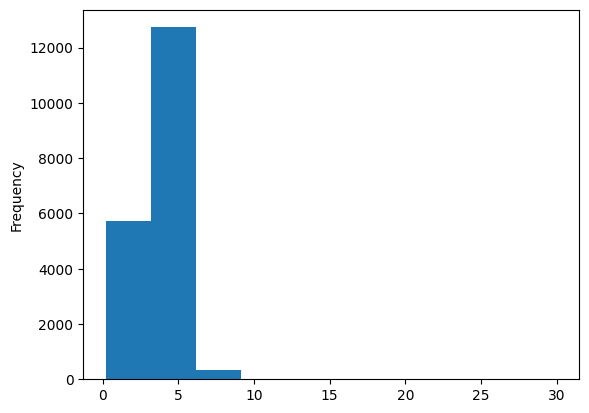

<Figure size 640x480 with 0 Axes>

In [174]:
X['song_duration_ms'].apply(lambda x: x/60000).plot.hist()
plt.figure()

<Axes: ylabel='Frequency'>

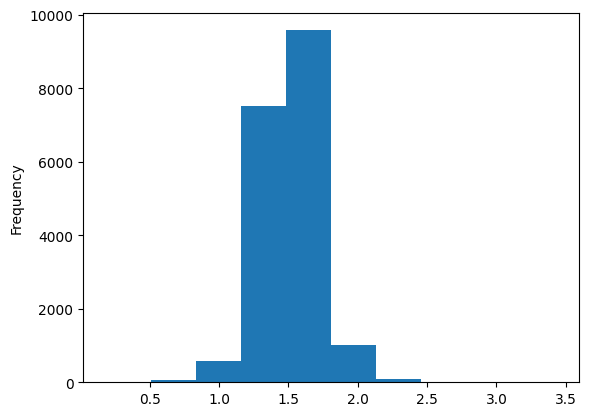

In [175]:
X['song_duration_ms'].apply(lambda x: np.log1p(x/60000)).plot.hist()

In [176]:
from sklearn.preprocessing import PowerTransformer

In [177]:
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(df_num)
transformed_df = pd.DataFrame(transformed_data, columns = df_num.columns, index=df_num.index)

In [178]:
transformed_data

array([[ 0.92921983,  0.84772093, -1.15229222, ...,  1.51966468,
         0.07501486, -0.21103405],
       [ 0.58560858,  0.09240977, -1.10723395, ..., -0.50216438,
         0.07501486, -0.63928059],
       [ 1.07805105,  0.35308162, -1.12720969, ...,  0.17128851,
         0.07501486, -0.82993319],
       ...,
       [-1.37737521, -0.58815343,  1.58917365, ...,  0.39640409,
         0.07501486, -0.98803065],
       [ 0.05695282,  2.04880137,  1.66862583, ..., -0.47150627,
         0.07501486, -0.83408658],
       [ 0.2954389 , -0.3543066 ,  1.64284474, ..., -1.04942132,
         0.07501486,  0.22578261]], shape=(18835, 14))

<function matplotlib.pyplot.show(close=None, block=None)>

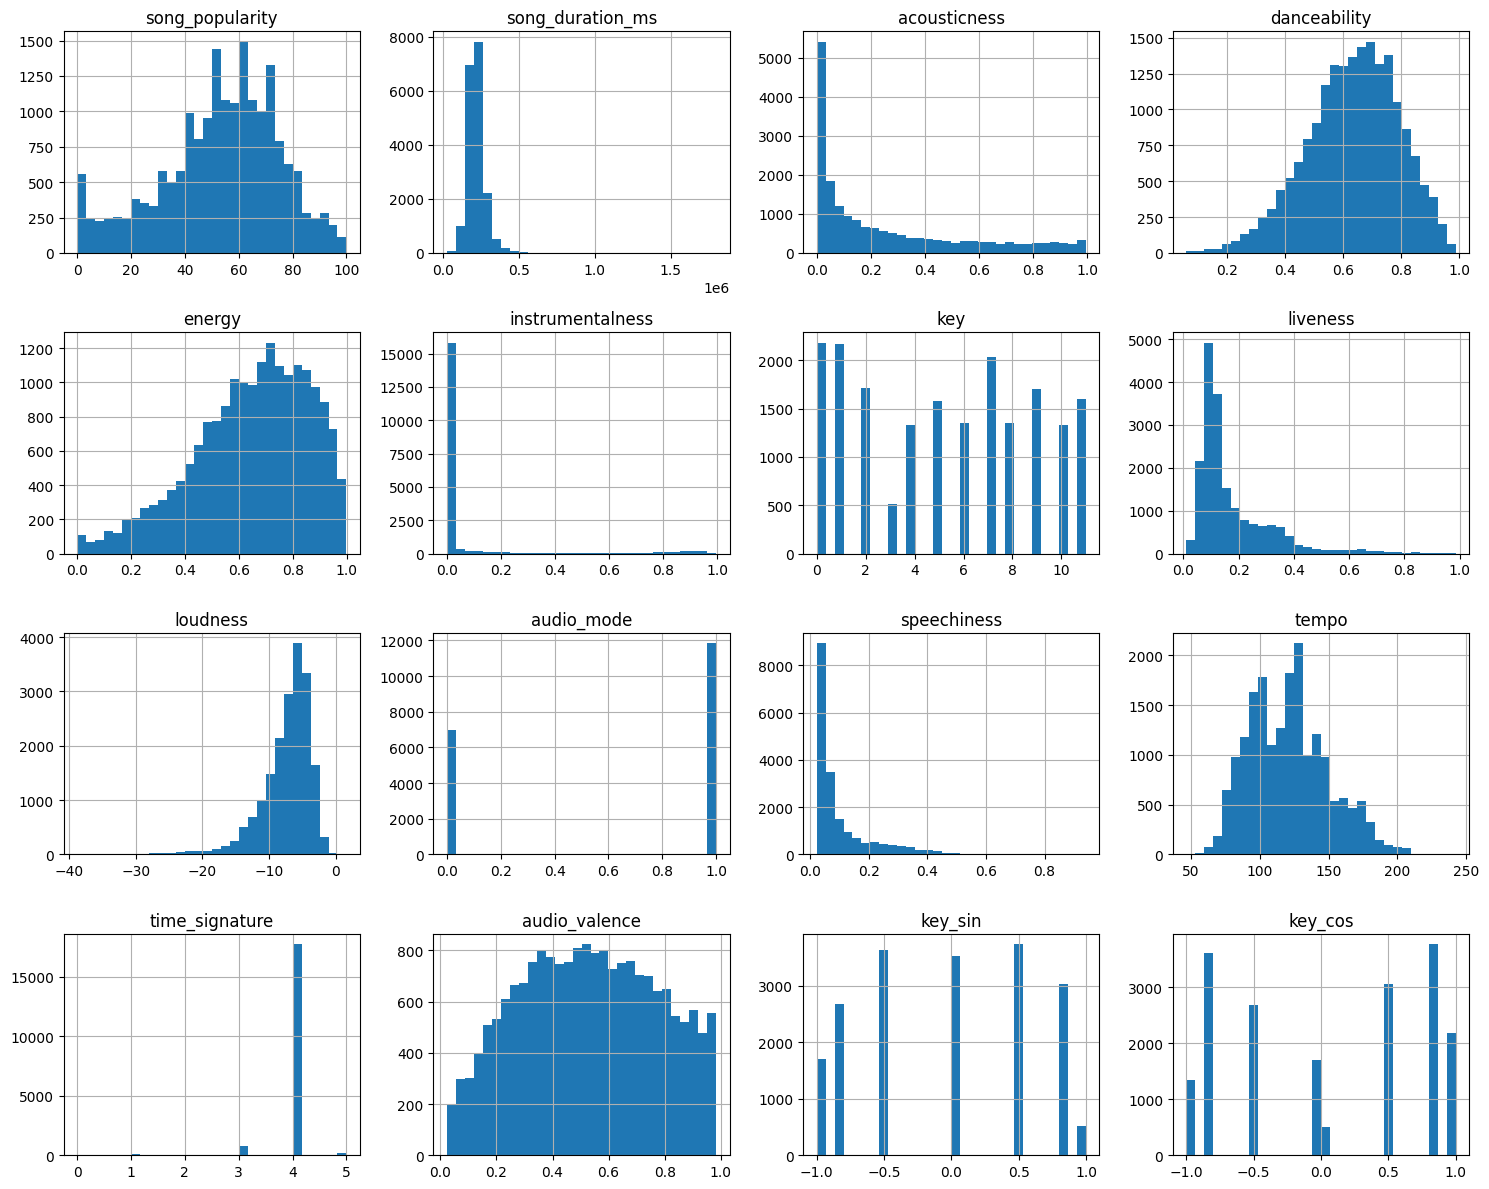

In [179]:
# Matplotlib histogrammen plotten 
df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

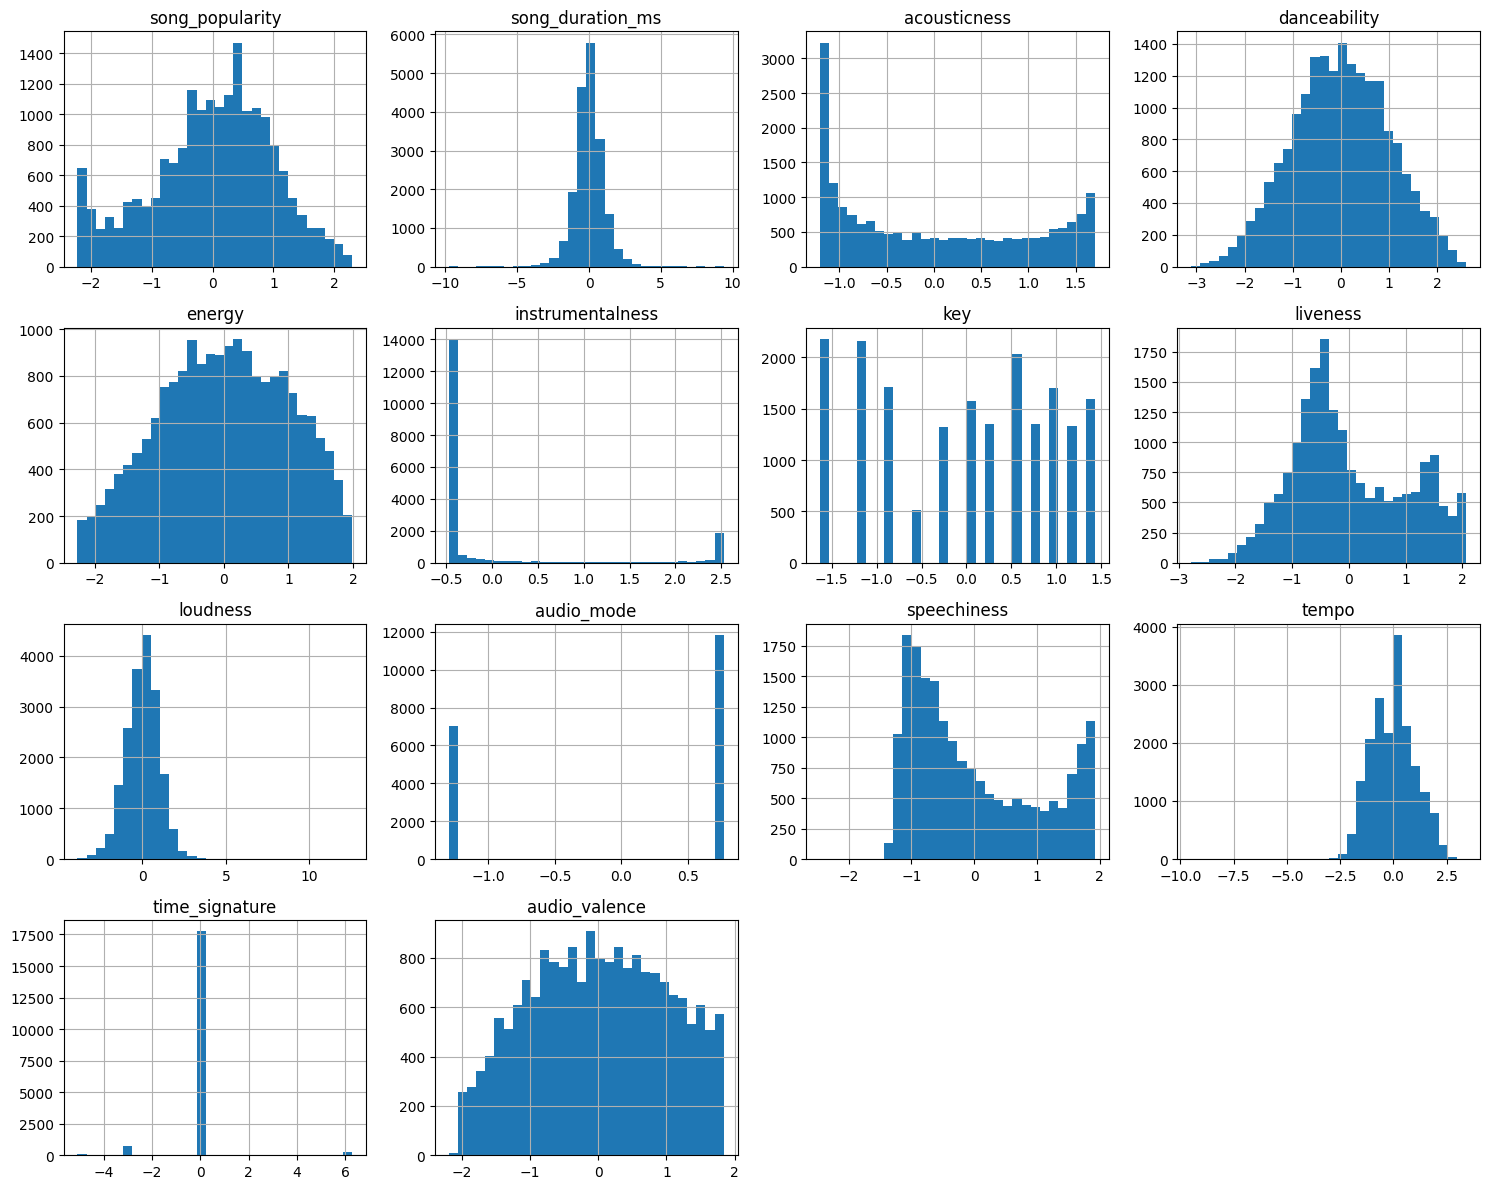

In [180]:
# Matplotlib histogrammen plotten 
transformed_df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show

In [181]:
def skewness_kurtosis(transformed_df):
    skewness = transformed_df.skew(numeric_only=True)
    kurtosis = transformed_df.kurt(numeric_only=True)

    stats_skew_kurt = pd.DataFrame({
        'skewness': skewness,
        'kurtosis': kurtosis
    })

    def highlighter(rij):
        skew = rij['skewness']
        color = ''
        if skew > 1 or skew < -1: # Hoge scheefheid (groter dan 1 of kleiner dan -1) kleur = rood 
            color = 'background-color: red; color: black;'
        elif 0.5 < abs(skew) <=1: # Matige scheefheid (scheefheid tussen -1 en -0.5 of tussen 0.5 en 1) kleur = blauw 
            color = 'background-color: #336df5; color: black;'
        elif abs(skew) <= 0.5: # Redelijk symmetrische distributie (scheefheid tussen -0.5 en 0.5) geen highlight
            color = 'color: white;'
        return ['' if c != 'skewness' else color for c in stats_skew_kurt.columns]
    
    styled = stats_skew_kurt.style.apply(highlighter, axis=1)
    display(styled)
    return stats_skew_kurt

skewness_kurtosis(transformed_df)

,skewness,kurtosis
song_popularity,-0.309145,-0.377780
song_duration_ms,0.034659,3.996462
acousticness,0.315136,-1.381993
danceability,-0.034230,-0.420490
energy,-0.112165,-0.795731
instrumentalness,1.903835,1.860718
key,-0.245362,-1.255199
liveness,0.318681,-0.791268
loudness,0.040209,2.877635
audio_mode,-0.530308,-1.718956


,skewness,kurtosis
song_popularity,-0.309145,-0.377780
song_duration_ms,0.034659,3.996462
acousticness,0.315136,-1.381993
danceability,-0.034230,-0.420490
energy,-0.112165,-0.795731
instrumentalness,1.903835,1.860718
key,-0.245362,-1.255199
liveness,0.318681,-0.791268
loudness,0.040209,2.877635
audio_mode,-0.530308,-1.718956


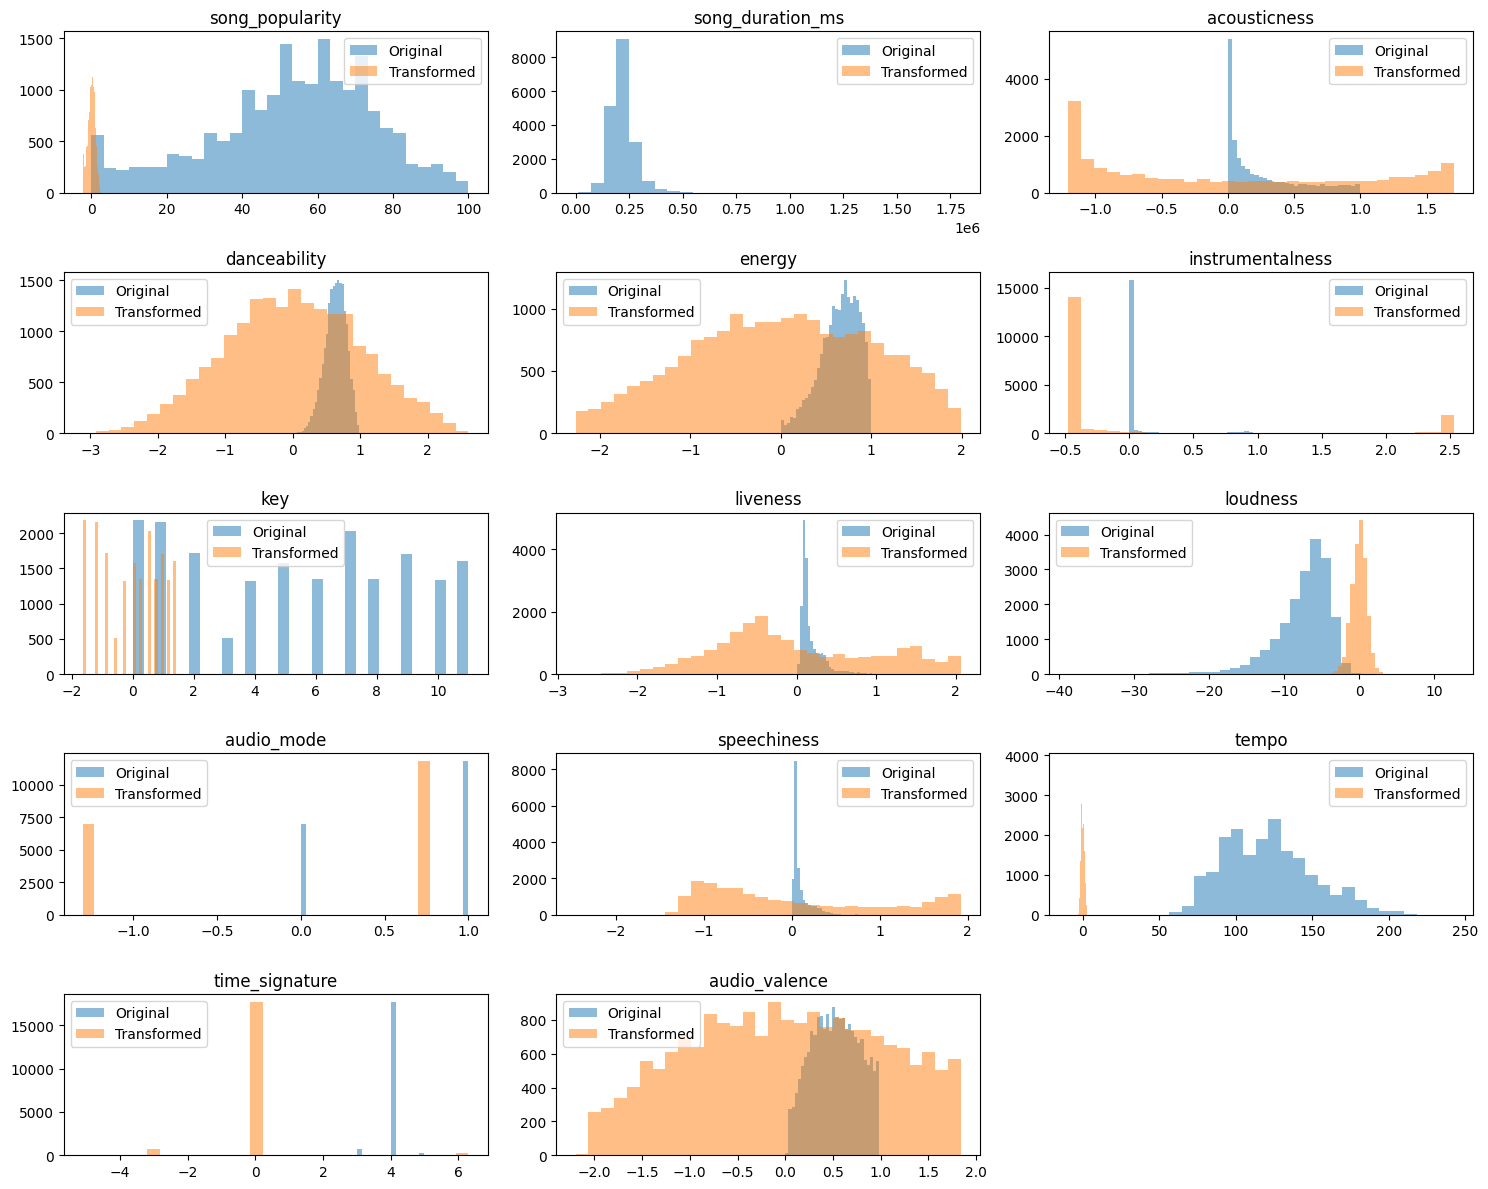

In [182]:
cols = df_num.columns
n_cols = 3  # how many plots per row
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

for i, col in enumerate(cols):
    r, c = divmod(i, n_cols)
    ax = axes[r, c]

    # Plot original
    ax.hist(df_num[col], bins=30, alpha=0.5, label='Original')
    # Plot transformed
    ax.hist(transformed_df[col], bins=30, alpha=0.5, label='Transformed')

    ax.set_title(col)
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    axes[r, c].axis('off')

plt.tight_layout()
plt.show()
